# Artificial datasets

In [26]:
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_classification, make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def plot_svc(model,X,y):
    model.fit(X,y)
    y_hat = model.predict(X)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVC Decision Boundaries')
    plt.show()

    return accuracy_score(y,y_hat)

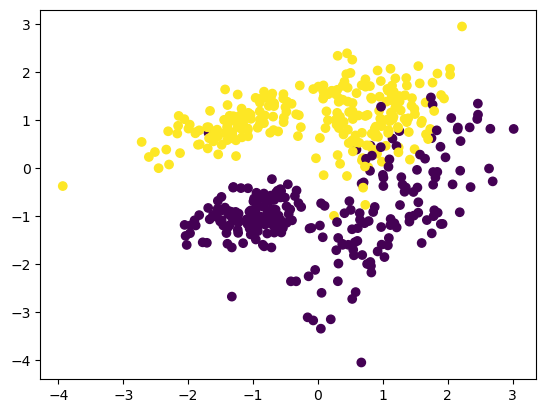

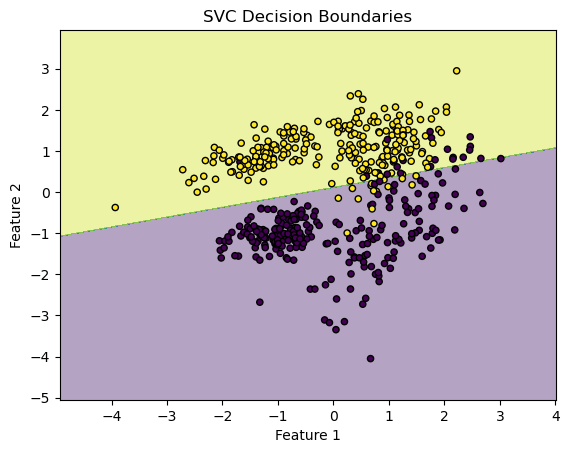

0.93


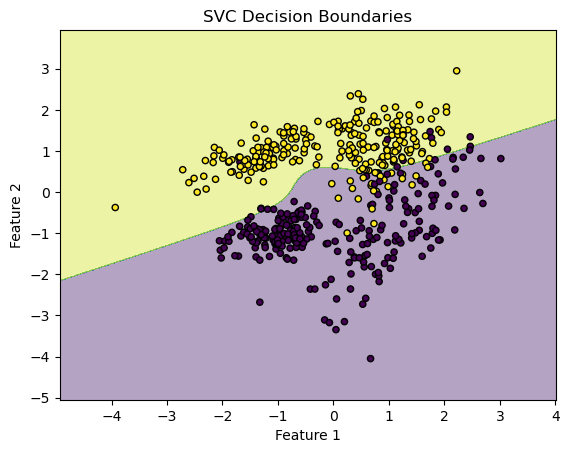

0.926


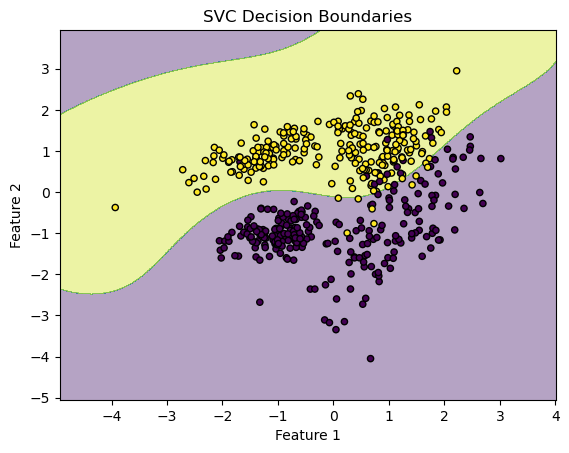

0.954


In [21]:
X,y = make_classification(n_samples=500,n_features=2, n_clusters_per_class=2, n_redundant=0,class_sep=1, random_state=4)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

model_linear = SVC(kernel='linear')
model_poly = SVC(kernel='poly')
model_radial = SVC(kernel='rbf')

print(plot_svc(model_linear,X,y))
print(plot_svc(model_poly,X,y))
print(plot_svc(model_radial,X,y))

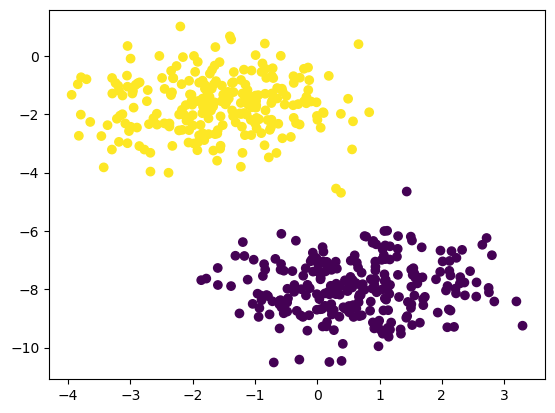

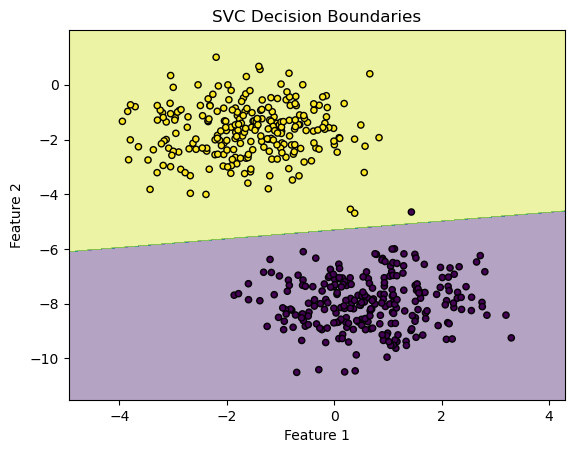

0.998


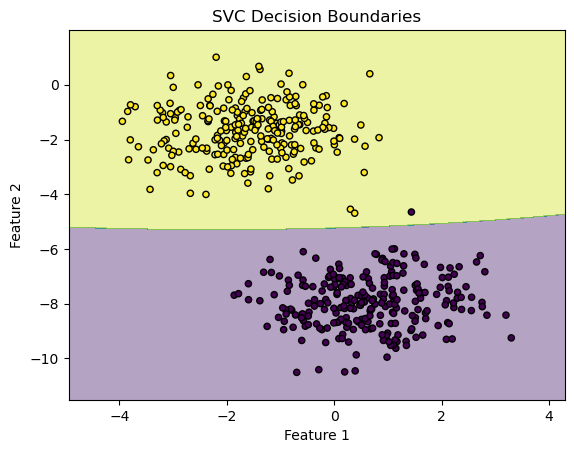

0.998


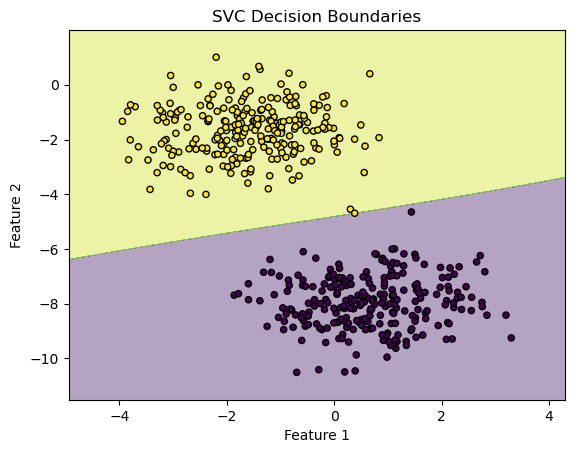

0.998


In [24]:
X,y = make_blobs(n_samples=500,n_features=2, centers=2)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

model_linear = SVC(kernel='linear')
model_poly = SVC(kernel='poly')
model_radial = SVC(kernel='rbf')

print(plot_svc(model_linear,X,y))
print(plot_svc(model_poly,X,y))
print(plot_svc(model_radial,X,y))

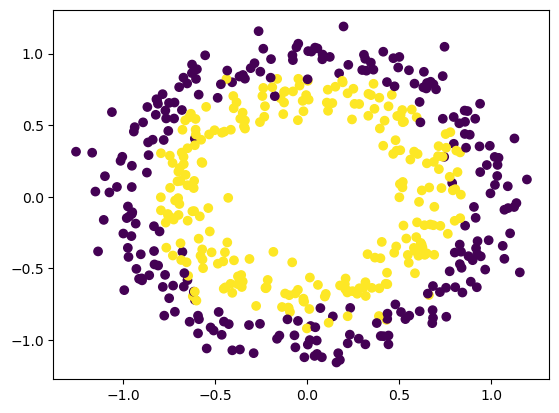

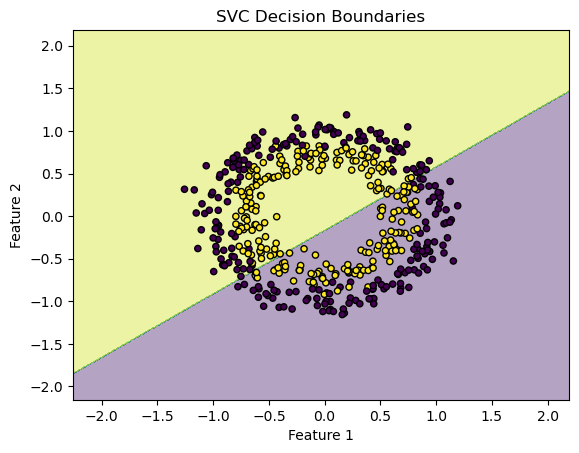

0.504


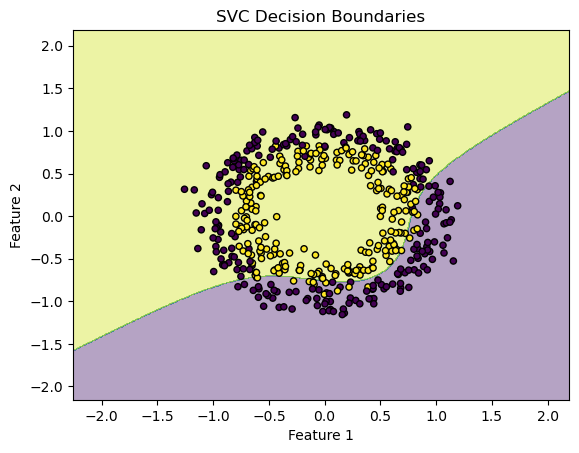

0.672


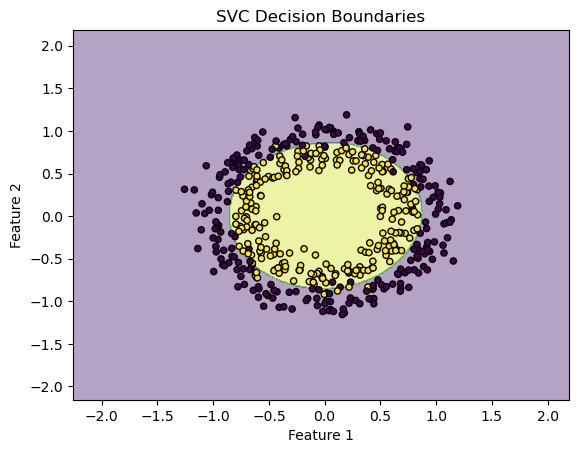

0.948


In [25]:
X, y = make_circles(500, factor=0.7, noise=.1, random_state=0)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

model_linear = SVC(kernel='linear')
model_poly = SVC(kernel='poly')
model_radial = SVC(kernel='rbf')

print(plot_svc(model_linear,X,y))
print(plot_svc(model_poly,X,y))
print(plot_svc(model_radial,X,y))

# The linear kernel in C-SVC

In [28]:
X,y = load_breast_cancer(return_X_y=True)

def plot_C(c):
    svc = SVC(kernel='linear',C=c).fit(X,y)
    return len(svc.support_vectors_)

c=[0.001,0.01,0.1,1,5,10,15,20,30, 40, 50, 60,70,80,90,100]

cs = list(map(plot_C,c))

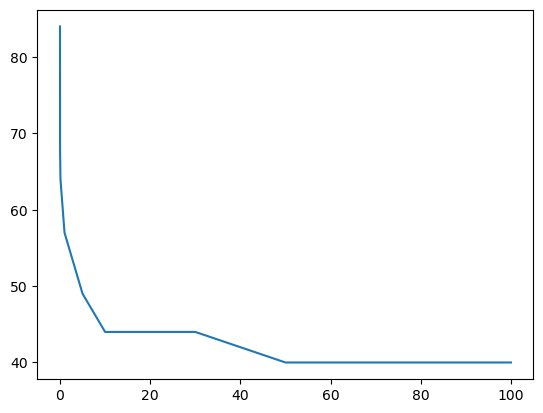

In [29]:
plt.plot(c,cs)
plt.show()

In [31]:
c_min = float('inf')
c_t = 0
for i in range(len(c)):
    if cs[i] < c_min:
        c_min = cs[i]
        c_t = c[i]

model = SVC(kernel='linear',C=c_t)

scores = cross_val_score(model,X,y)
print(scores)

[0.93859649 0.95614035 0.96491228 0.94736842 0.97345133]


In [32]:
er = 1-np.mean(scores)

In [33]:
def plot_C_error(c):
    svc = SVC(kernel='linear',C=c).fit(X,y)
    scores = cross_val_score(model,X,y)
    return 1-np.mean(scores)

c=[0.001,0.01,0.1,1,5,10,15,20,30, 40, 50, 60,70,80,90,100]

cs = list(map(plot_C_error,c))

KeyboardInterrupt: 